# EV Failure Rate Test

Test if control failure will impact EVA response.

In [1]:
%run -i 'cosim_import.py'

0.post4601.dev0+g69e758d
2.8.0


In [2]:
plt.style.use(['science','ieee'])

In [3]:
# if save the data to CSV
save_data = True
file_beging = 'cosim_'
sim_name = 'ieee39_fict'

# case parameters
case_name = 'ieee39'
caseH = 18  # start time [H] of the co-simulation
ict = False
fail_rate = 0.05
ecc = False
agc = True

# Change ``rru``, ``rrd``, ``rsfr``, ``t_total`` for necessary.
t_total = 3600

rru, rrd, rsfr = 1.0, 1.0, 0.05

In [4]:
%run -i 'cosim_setup_andes.py'

EVA: ts=18[H], 50000 EVs, Total Q=434.54 MWh
Online 14477, Q=362.27 MWh, SoC=0.7435
Power(MW): Pt=-39.0266, Pc=-39.0266, Pd=0.0
Ctrl: 0=7897; 1=6580; 
EVA: Load A from Aest.csv.


Generating code for 1 models on 8 processes.


In [5]:
%run -i 'cosim_loadsyn.py'

ANDES total load is: 58.564 p.u.


In [6]:
%run -i 'cosim_setup_dispatch.py'

Set parameter Username
Academic license - for non-commercial use only - expires 2024-05-21


RTED GB model is loaded.
RTED removed: ['rampu', 'rampd']
RTED limited: sfru, sfrd
RTED: total cost=4889.131


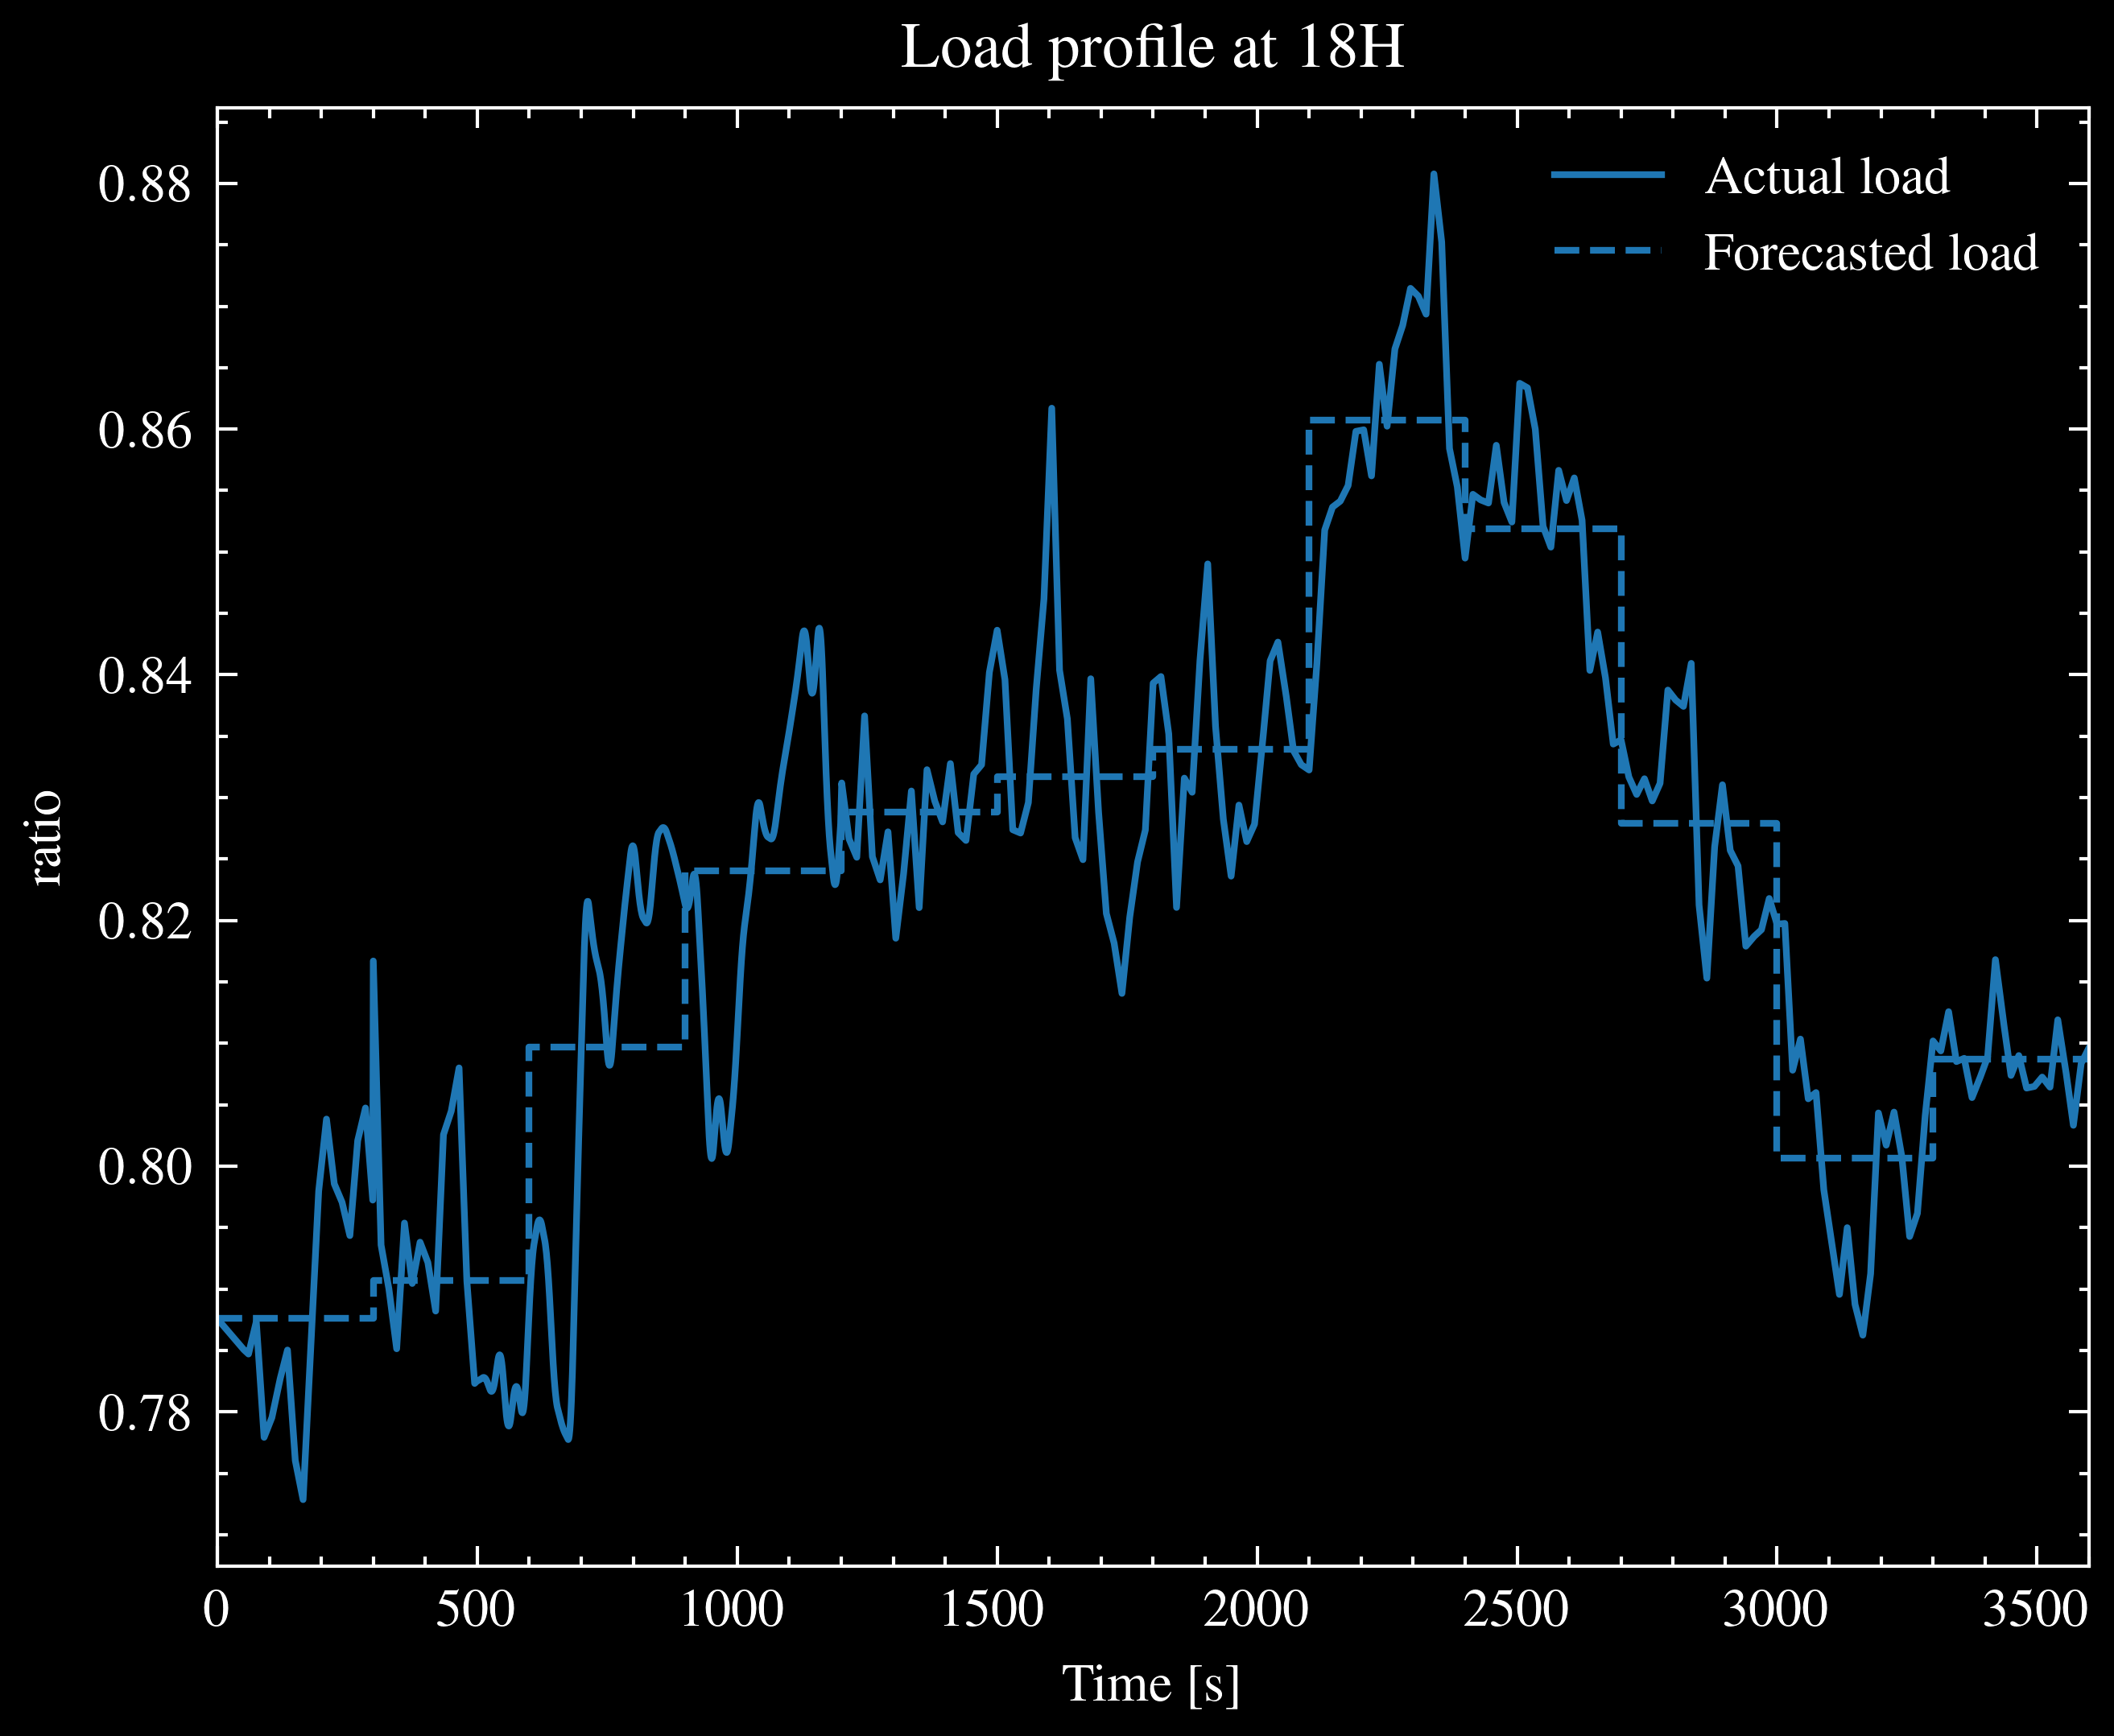

In [7]:
plt.show()

In [8]:
case_name = 'cosim_ieee39_'

evf = pd.read_csv(case_name+'fict'+'_sse.csv')
evs = pd.read_csv(case_name+'s'+'_sse.csv')
evfn = pd.read_csv(case_name+'f'+'_sse.csv')

In [9]:
for end_time in tqdm(range(1, 3600)):  # t_total
        sse.run(tf=caseH+end_time/3600, Pi=evfn['Pi'].iloc[end_time],
                is_updateA=False, is_rstate=True,
                is_test=False, disable=True,
                fail_rate=fail_rate)

100%|██████████| 3599/3599 [02:45<00:00, 21.77it/s]


In [10]:
squared_diff = (sse.tsd['Pi'] - sse.tsd['Prc']) ** 2
mean_squared_diff = np.mean(squared_diff)
rmse = np.sqrt(mean_squared_diff)
rmse

2.9142568468872407

(<Figure size 600x300 with 1 Axes>,
 <AxesSubplot:title={'center':'EVA'}, xlabel='Time [s]', ylabel='Power (MW)'>)

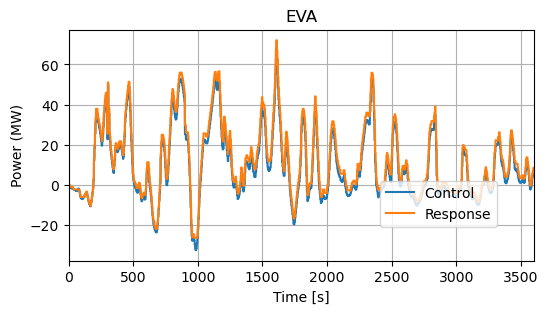

In [11]:
sse.plot(plt_vars=['Pi', 'Prc'], legends=['Control', 'Response'])

In [12]:
sse.tsd.to_csv(file_beging + sim_name + '_sse_fr' + str(int(100 * fail_rate)) + '.csv', index=False)